In [1]:
#!/usr/bin/env python

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pylab as pl
import seaborn as sn

import random
import sys

from sklearn.model_selection import train_test_split
from sklearn import metrics

from pandas import set_option
pd.options.mode.chained_assignment = None

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import truncnorm
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [3]:
class MLPlot:
    
    # Edit the font, font size, and axes width
    mpl.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 24
    plt.rcParams['axes.linewidth'] = 3
    
    def __init__(self, pred, y):
        self.qm = y
        self.ml = pred
        
    # Plot outputs
    def corrplot(self):
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot()

        plt.plot(self.qm, self.ml,'ro',fillstyle='none')

        # compute pearson correlation coefficient and coefficient of determination 
        pcc, _ = pearsonr(self.qm, self.ml)
        r2 = r2_score(self.qm, self.ml)

        
        # determine the range
        qm_max=np.max(self.qm)
        qm_min=np.min(self.qm)
        ml_max=np.max(self.ml)
        ml_min=np.min(self.ml)
        sigma=np.std(self.qm)+np.std(self.ml)
        ax_low=min(qm_min,ml_min)-sigma
        ax_up=max(qm_max,ml_max)+sigma
        
        plt.xlim(ax_low,ax_up)
        plt.ylim(ax_low,ax_up)
        plt.plot([ax_low,ax_up],[ax_low,ax_up], '--b')

        plt.xlabel('QM i-RESP charge (e)')
        plt.ylabel('ML charge (e)')
        
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.tick_params(axis='both', which='major', direction='in', length=14, width=4, color='k')
        ax.tick_params(axis='both', which='minor', direction='in', length=8, width=2, color='k')


        #ax.xaxis.grid(True, which='minor')
        # square figure
        ax.set_aspect('equal', adjustable='box')
        plt.title(f'pcc: {pcc:.2f}, R²: {r2:.2f}')

        plt.show()
    
    
    def cmplot(self):
        '''
        plot the reference and predicted data for direct comparison
        '''
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot()
        skip = int(len(self.qm)/1000)
        plt.plot(self.qm[::skip], color='red', marker='o', linewidth=1, label = 'QM i-RESP charge (e)')
        plt.plot(self.ml[::skip], color='blue', marker='o', linewidth=1, label = 'ML charge (e)')
        plt.legend(loc='best')
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.tick_params(axis='both', which='major', direction='in', length=14, width=4, color='k')
        ax.tick_params(axis='both', which='minor', direction='in', length=8, width=2, color='k')
        
        plt.xlabel('Index')
        plt.ylabel('Atomic charge (e)')
        plt.show()

In [4]:
# Read the data from a text file
csv = pd.read_csv('Ca_all_data.txt', delimiter=',', header=None)

In [5]:
name = list()
ele_tup=('H','C','N','O','Ca')
for i in range(1,13):
    name.append(f'deg_r{i:d}')
    name.append(f'bet_r{i:d}')
    name.append(f'clust_r{i:d}')
    name.append(f'clos_r{i:d}')
for i in ('Ca','wat'):
    name.append('deg_'+i)
    name.append('bet_'+i)
    name.append('clust_'+i)
    name.append('clos_'+i)
for cut in (2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0):
    for i in ele_tup:
        name.append(i+f'_{cut:2.1f}')
for cut in (3.0,6.0):
    for i in range(5):
        for j in range(i+1):
            name.append(ele_tup[j]+ele_tup[i]+f'_{cut:2.1f}')
name.append('Cachg')

In [6]:
csv.columns=name
csv=csv[csv.columns.drop(list(csv.filter(regex='Ca_')))]

In [7]:
rstate = 185054330

In [8]:
feat=csv[csv.columns[56:-1]]
chg=csv[csv.columns[-1]]

X_tr, X_te, y_tr, y_te = train_test_split(feat, chg, test_size=0.3)

In [12]:
# those hyperparameters seem to be optimized through multiple cross-validation runs
RFR = RandomForestRegressor(
    random_state=rstate, 
    criterion='absolute_error', 
    n_estimators=500, 
    oob_score=True, 
    n_jobs=10
    )

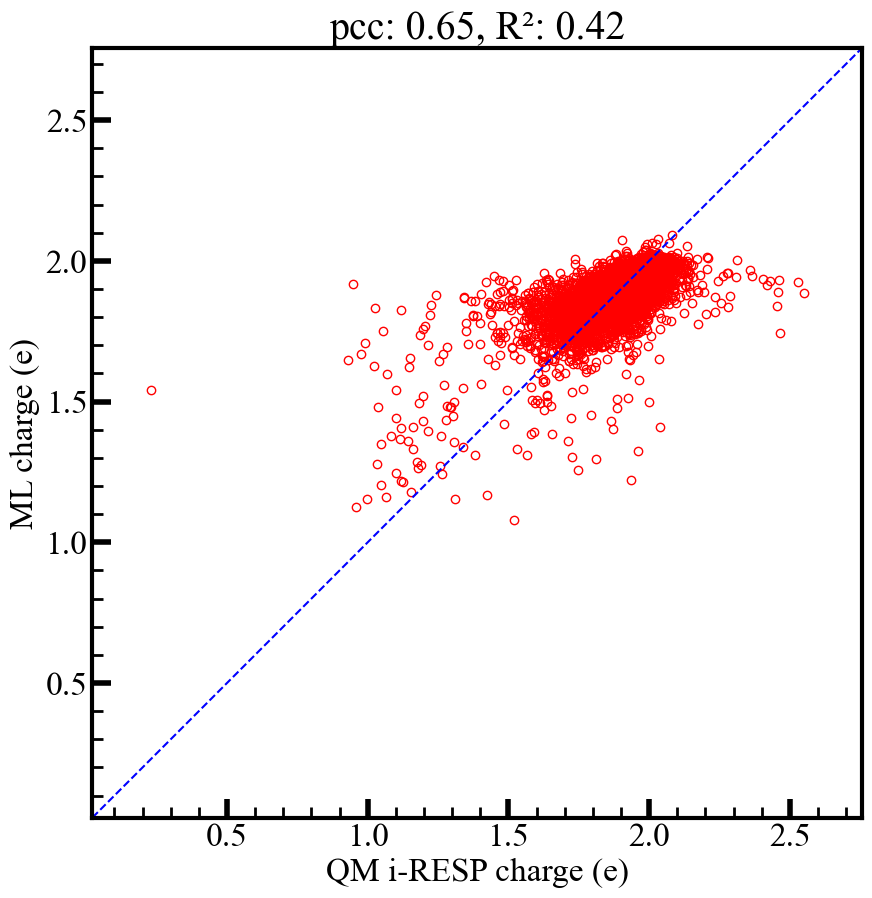

In [13]:
from sklearn.model_selection import cross_val_predict

output = cross_val_predict(RFR, feat, chg, cv=5, n_jobs=10)
mlplot = MLPlot(output, chg)
mlplot.corrplot()

In [ ]:
4 secs vs 40 minutes